# CUSTOMER SEGMENTATION USING CLUSTERING

**Hello Everyone!!Welcome to my customer segmentation jupyter notebook.
Here I demonstrate the clustering technique skills in python to differentiate between data points with similar features and characteristics.**

**Clustering is a type of unsupervised learning in Machine learning,where there is no target/response variable and we can use these techniques for classifying spam messages,fraudulent actions,cutomer segmentation in various fields.**

**Customer segmentation is also known as market segmentation. It means dividing customers into groups based on similar functionality.Customer segmentation is about identifying the most profitable customer and tailoring products and offerings to meet customer needs.**
- In this Dataset,The data is about the credit card customers with credit history and certain more features.
- Here.clusteirng using kmeans method is used to sperate the customers into clusters with similar features and patterns
- Clustering of customers here helps in identifying type of customers and their preferences,purchase history and favourable   credit offers etc. wich can be further used in customer satisfaction and increase in business.


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/credit.csv')

In [2]:
df.head()
data=df.drop('CUST_ID',axis=1)

In [3]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(skipna=True), inplace=True)
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(skipna=True), inplace=True)

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


**EXPLORATORY DATA ANALYSIS**

<AxesSubplot:>

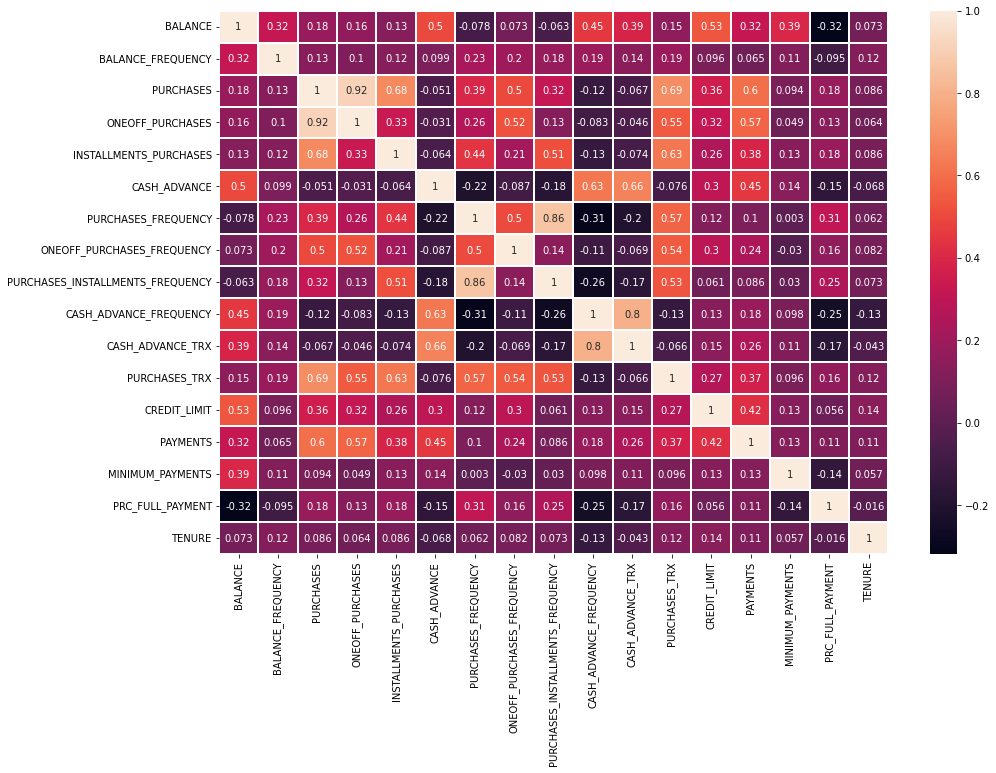

In [7]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.02)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

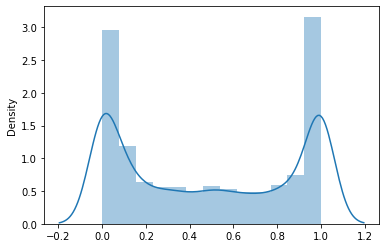

In [8]:
sns.distplot(x=df['PURCHASES_FREQUENCY'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

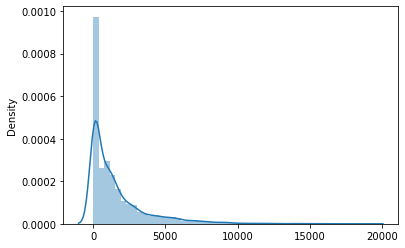

In [9]:
sns.distplot(x=df['BALANCE'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

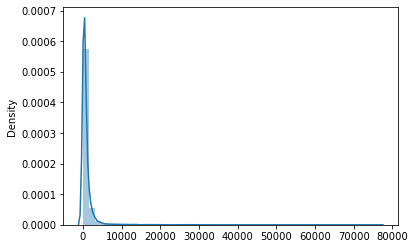

In [10]:
sns.distplot(x=df['MINIMUM_PAYMENTS'])

In [ ]:
plt.hist(x=df['CREDIT_LIMIT'])

It can be observed from the visualization that the features follow different distributions:
- features have bimodel,positively skewed and negatively skewed distributions.
- The features are history of  customer having credit based attributes which be explained graphically about their pattern,distribution,correlation,significance etc which can help in understanding the clusters better for customers.


**TRANFORMATION OF DATA AND FITTING USING KMEANS CLUSTERING**

In [22]:
scaler = StandardScaler()
x = scaler.fit_transform(data)

kmeans = KMeans(6)
kmeans.fit(x)
labels = kmeans.labels_
clusters = pd.concat([df, pd.DataFrame({"Cluster": labels})], axis=1)
print(clusters)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


             X         Y  Labels  Cluster
0    -1.682220 -1.076451       1        2
1    -1.138295  2.506477       4        5
2     0.969684 -0.383520       5        3
3    -0.873628  0.043166       1        2
4    -1.599434 -0.688581       1        2
...        ...       ...     ...      ...
8945 -0.359629 -2.016145       3        4
8946 -0.564369 -1.639123       3        4
8947 -0.926204 -1.810786       3        4
8948 -2.336552 -0.657966       1        2
8949 -0.556422 -0.400467       1        2

[8950 rows x 4 columns]


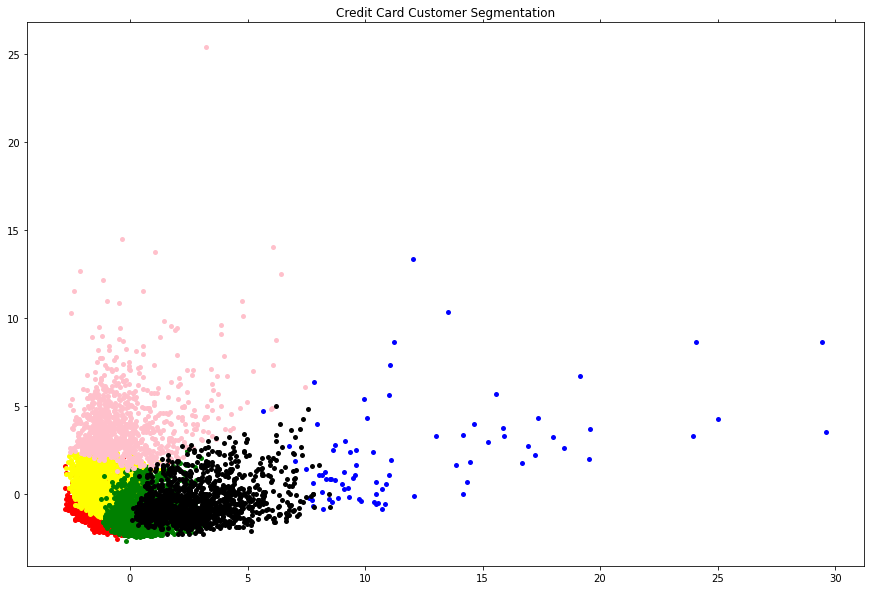

In [14]:
colors = {0:"red", 1:"yellow", 2:"blue", 3:"green", 4:"pink",5:'black'}
pca = PCA()
principal_components = pca.fit_transform(x)
x, y = principal_components[:,0], principal_components[:,1]
df = pd.DataFrame({"X": x, "Y": y, "Labels": labels})
groups = df.groupby(labels)

fig, ax = plt.subplots(figsize=(15, 10)) 

for i, j in groups:
    ax.plot(j.X, j.Y, marker='o', linestyle='', ms=5, color=colors[i], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("Credit Card Customer Segmentation")
plt.show()